# SD212: Graph mining
## Lab 2: Random graphs

You will learn to generate random graphs.

You **must** be connected to Telecom ParisTech network!

## Getting started

In [151]:
from connector import Connector

UsageError: Line magic function `%matlibplot` not found.


In [337]:
import warnings
import itertools 

In [161]:
base_url = 'http://137.194.192.13:8234'
lab_id = 'lab2'

## To do

* Enter your login and test it using question #0

In [ ]:
# Enter your login (family name + first letter of first name)
login = 'zhuf'

In [ ]:
connector = Connector(base_url, lab_id, login)
get_question = connector.get_question
post_answer = connector.post_answer
post_text = connector.post_text

In [ ]:
get_question(0)

## Import

In [ ]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [ ]:
%pylab notebook

In [162]:
import numpy as np

## 1. Erdos-Renyi graphs

The `networkx` package contains functions to generate random graphs.

In [165]:
n = 100
p = 0.03

In [ ]:
G = nx.erdos_renyi_graph(n,p)

In [247]:
print(nx.info(G))


def show_random(n,p):
    G = nx.erdos_renyi_graph(n, p)
    figure()
    nx.draw(G, node_size = 3)
    print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 282
Average degree:   5.6400


In [248]:
nx.draw(G, node_size=3)

## To do

* Generate several instances of the graph and observe the results
* Answer question #1 **(1 point)**

**Hint:** Use the local approximation of the graph by a Galton-Watson tree.

<IPython.core.display.Javascript object>


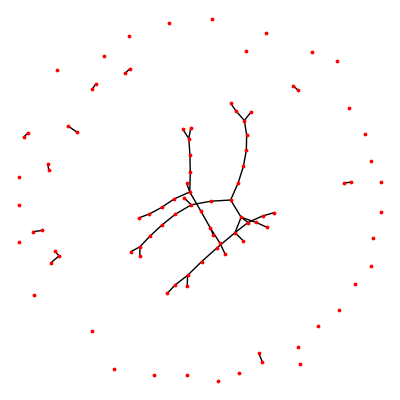

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 58
Average degree:   1.1600


In [249]:
show_random(100,0.01)

In [48]:
arg = get_question(1)
print(arg)

What is the probability that an Erdos-Renyi graph of 100 nodes with p as given is connected?
(Check the argument; enter a float)
{'p': 0.0390858393856745}


In [250]:
# to be modified
answer = arg['p'] ** 200
answer

KeyError: 'p'

In [61]:
post_answer(1, answer)

Wrong answer


We now focus on the largest connected component of the graph.

In [62]:
n = 200
p = 0.01
G = nx.erdos_renyi_graph(n,p)
Gc = max(nx.connected_component_subgraphs(G), key = len)

In [63]:
print(nx.info(Gc))

Name: 
Type: Graph
Number of nodes: 168
Number of edges: 191
Average degree:   2.2738


## To do

* Generate several instances of the graph (for different values of $n$ and $p$) and observe the size and the average degree of the largest connected component
* Answer question #2 **(open answer)**

In [64]:
get_question(2)

Interpret the results.


In [80]:
post_text(2)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())

Answer posted
Answer posted


## 2. Preferential attachment

The degree distribution of an Erdos-Renyi graph is approximately binomial (for large n), as shown below.

In [31]:
n = 500
p = 0.01
G = nx.erdos_renyi_graph(n,p)

<IPython.core.display.Javascript object>


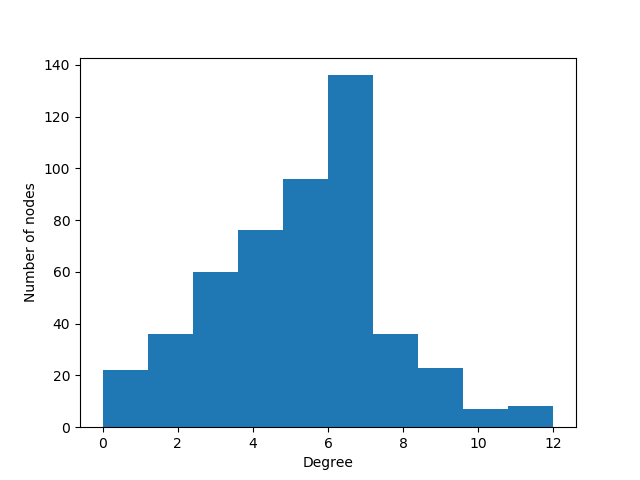

In [32]:
degree_list = [G.degree(u) for u in G.nodes()]
figure() 
hist(degree_list)
xlabel('Degree')
ylabel('Number of nodes')
show()

The Barabasi-Albert model, based on the principle of **preferential attachment**, provides a random graph with a **power-law** degree distribution.

In [81]:
n = 100
d = 3 # degree of new nodes
G = nx.barabasi_albert_graph(n, d) 
G.add_edges_from(nx.complete_graph(d).edges()) # adding the initial clique (removed by networkx)

In [82]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 294
Average degree:   5.8800


<IPython.core.display.Javascript object>


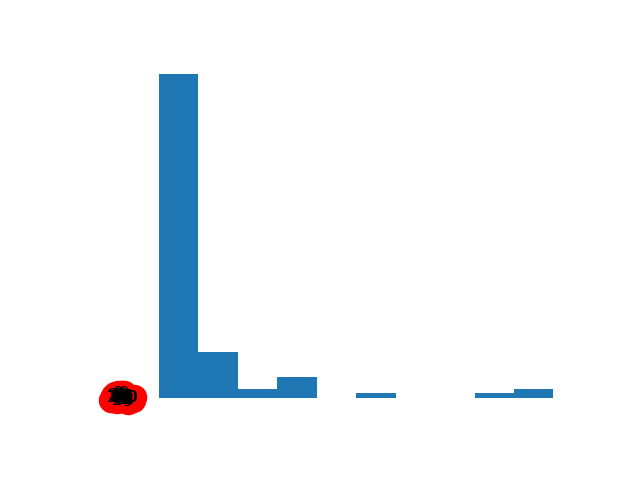

In [83]:
degree_list = [G.degree(u) for u in G.nodes()]
figure() 
hist(degree_list)
xlabel('Degree')
ylabel('Number of nodes')
show()

## To do

* Code a function that generates a Barabasi-Albert graph starting from any initial graph (not necessarily a clique)
* Answer question #3 **(1.5 points)**

In [242]:
def general_barabasi_albert_graph(n, d, init_G):
    print(init_G.edges)
    # init_G must be connected with at least d and at most n nodes
    G = init_G.copy()
    nb_new_node = n - G.number_of_nodes()
    if nb_new_node == 0: return
    for nb in range(G.number_of_nodes(), n):
        p_list = np.array([y for x,y in G.degree()])
        p_list = p_list / np.sum(p_list)
        selected_nodes = np.random.choice(list(G.nodes), size=d,replace=False, p=p_list)
        for node in selected_nodes:
            G.add_edge(nb, node)
        # to be completed
        # you may use the function nb.random.choice
    return G    

In [ ]:
p_list = [x for x in G.degree()]
print(G.degree)

In [ ]:
# To check
G = general_barabasi_albert_graph(100, 3, nx.complete_graph(3))
print(nx.info(G))

In [236]:
arg = get_question(3)

Generate a general Barabasi-Albert graph for n = 100 and d = 3 starting from the initial graph given in the argument.
(Enter a list of edges)


In [ ]:
init_G = nx.Graph(arg['edge_list'])

In [243]:
G  = general_barabasi_albert_graph(100, 3, init_G)

[(0, 1), (1, 4), (1, 5), (1, 2), (4, 3), (4, 7), (4, 5), (5, 6), (2, 3), (7, 6), (7, 8), (8, 9)]


In [244]:
post_answer(3, list(G.edges()))

This is correct!


## 3. Configuration model

We now focus on graphs with some given degree sequence. The Havel-Hakimi algorithm generates such a graph provided the degree sequence is valid (that is, **graphical**); otherwise, it returns an error. The resulting graph is not necessarily connected.

In [255]:
H = nx.havel_hakimi_graph([3,2,3,2])

<IPython.core.display.Javascript object>


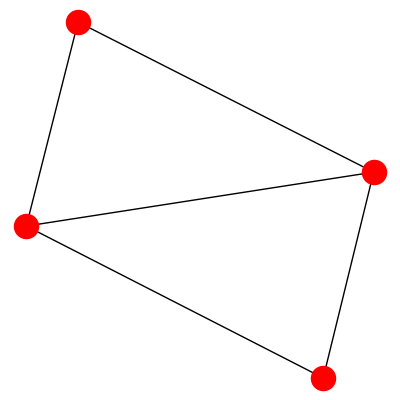

In [256]:
figure()
nx.draw(H)

## To do 

* Test various degree sequences (you may get valid sequences from actual graphs, see the [networkx graph generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html))
* Download the graph of [Les Miserables](http://perso.telecom-paristech.fr/~bonald/graphs/lab2.zip) (co-occurence of characters in chapters of the novel of Victor Hugo)
* Answer questions #4 and #5 **(0.5 point each)**

In [275]:
G = nx.read_graphml("miserables.graphml", node_type = int)

In [276]:
print(nx.info(G))

Name: Les Miserables
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [269]:
names = nx.get_node_attributes(G, 'name')

<IPython.core.display.Javascript object>


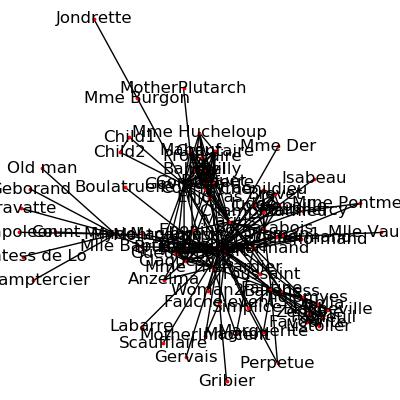

In [270]:
figure()
nx.draw(G, labels = names, node_size=3)

In [287]:
get_question(4)

How many connected components are there in the Havel-Hakimi graph associated with the degree sequence of Les Miserables?
(Enter an integer)


In [289]:
def solve4(G):
    degrees = dict(G.degree).values()
    H = nx.havel_hakimi_graph(degrees)
    return nx.number_connected_components(H),H
answer,H = solve4(G)
post_answer(4, answer)

This is correct!


In [288]:
get_question(5)

How many common edges are there with the original graph?
(Enter an integer)


In [296]:
inGH = nx.intersection(G,H)
answer = inGH.number_of_edges()
post_answer(5, answer)

This is correct!


The configuration model generates a random  instance of a **multi-graph** with some given  degree sequence. Any sequence of even sum is valid. Self-loops and multi-edges must be removed to get a simple graph.

In [297]:
C = nx.configuration_model([2,4])

In [298]:
print(nx.info(C))

Name: 
Type: MultiGraph
Number of nodes: 2
Number of edges: 3
Average degree:   3.0000


In [299]:
C = nx.Graph(C)
C.remove_edges_from(C.selfloop_edges())

In [300]:
print(nx.info(C))

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


## To do

* Test various degree sequences
* Generate random configurations associated with the degree sequence of Les Miserables and observe the fraction of common edges with the original graph
* Answer questions #6 **(0.5 point)** and #7 **(open answer)**

In [311]:
get_question(6)

What is the expected number of common edges between the graph of Les Miserables and an Erdos-Renyi graph of the same size (77 nodes and 254 edges on average)?
(Enter a float)
Wrong answer


In [316]:
254 * 254 *2 / (77 * 76)
post_answer(6, 22.049)

This is correct!


In [317]:
get_question(7)

Interpret the results. You must compare the mean numbers of common edges obtained with the Havel-Hakimi graph, the configuration model and the Erdos-Renyi graph.



In [342]:
post_text(7)


Textarea(value='...')

Button(description='Send', style=ButtonStyle())

Answer posted


## 4. Stochastic block model

The stochastic block model generates graphs with some underlying structure in blocks.

In [362]:
block_sizes = [10, 20, 30]
G = nx.random_partition_graph(sizes = block_sizes, p_in = 0.4, p_out = 0.02)

<IPython.core.display.Javascript object>


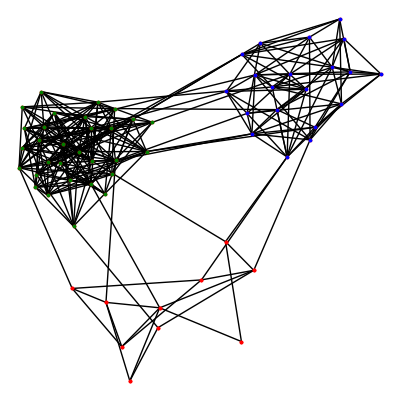

In [363]:
figure()
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=3)
block_indices = cumsum(block_sizes)
nodes = nx.draw_networkx_nodes(G, pos, nodelist = range(block_indices[0]), node_color = 'r', node_size=3)
nodes = nx.draw_networkx_nodes(G, pos, nodelist = range(block_indices[0], block_indices[1]), node_color = 'b', node_size=3)
nodes = nx.draw_networkx_nodes(G, pos, nodelist = range(block_indices[1], block_indices[2]), node_color = 'g', node_size = 3)

## To do

* Code a function that generates a stochastic block model with any block connectivity matrix (see below)
* Answer question #8 **(1 point)**

In [374]:
block_connectivity_matrix = np.array([[0.5,0.02,0.01],[0.02,0.4,0.],[0.01,0.,0.3]])

In [375]:
block_connectivity_matrix

array([[0.5 , 0.02, 0.01],
       [0.02, 0.4 , 0.  ],
       [0.01, 0.  , 0.3 ]])

In [377]:
# Probability of an edge between a node in block 0 and a node in block 1
block_connectivity_matrix[0,1]

0.02

In [378]:
block_sizes = [10, 20, 30]
G = nx.Graph()
for i in range(len(block_sizes)):
    G = nx.disjoint_union(block_sizes[i], block_connectivity_matrix[i][i])
print(nx.connected_components(G))




AttributeError: 'int' object has no attribute 'number_of_nodes'

In [353]:
def stochastic_block_model(block_sizes, block_connectivity_matrix):
    G = nx.Graph()
    subgraphs = []
    intervals = [0]
    for ind in range(len(block_sizes)):
        G = nx.disjoint_union(G, nx.erdos_renyi_graph(block_sizes[ind], block_connectivity_matrix[ind, ind])) # merge the subgraphs
    print(G.c
       
    # Now connect the inter block nodes:
    for interblocks in itertools.combinations(range(len(block_sizes)), 2):
        for i in range(intervals[interblocks[0]], intervals[interblocks[0]+1]):
            for j in range(intervals[interblocks[1]], intervals[interblocks[1]+1]):
                if np.random.uniform() < block_connectivity_matrix[interblocks[0], interblocks[1]]:
                    G.add_edge(i,j)
    return G

arg = get_question(8)
print(arg)

(TIME EXPIRED) Generate a stochastic block model with the parameters given in the argument.
(Enter a list of edges)
{'block_sizes': [13, 24, 33], 'block_connectivity_matrix': [[0.5, 0.02, 0.01], [0.02, 0.4, 0.0], [0.01, 0.0, 0.3]]}


In [354]:
block_sizes = arg['block_sizes']
block_connectivity_matrix = np.array(arg['block_connectivity_matrix'])

In [355]:
G = stochastic_block_model(block_sizes, block_connectivity_matrix)

TypeError: subgraph() missing 1 required positional argument: 'nodes'

In [356]:
post_answer(8, list(G.edges()))

(TIME EXPIRED) Wrong answer
